# Heart failure classification

The main goal of this project is to show usage of different machine learning techniques in classification where the dependent variable is death event. Dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. It was downloaded from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records. Project is divided into two parts. Firstly, the data is described, visualized and verified for occurence of incorrect values. After it, the feature selection methods are applied. Properly prepared dataset is used in the second part of this project, where selected variables are used in modelling. Before implementing various types of methods, the dataset is divided into train and test sample. The following classification techniques are selected:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Exploratory data analysis

Exploratory data analysis is a crucial part in every project. Without properly data, our work is useless. That's why we highly concentrate on data preparation. Also, it is important to be aware what is inside the data. In this part of project, emphasis is placed on knowing the data and preparing it to further analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import random
random.seed(8)

In [2]:
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


Variables description:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)


In [3]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
cat_var= ['anaemia', 'diabetes','high_blood_pressure', 'sex','smoking','DEATH_EVENT'] 
num_var = [i for i in df.columns if i not in cat_var]

Before making any visualisations, it's good to check the column types, basic statistics and number of NULLs. Based on these steps, we conclude that any actions in order to change the values in dataset are not necessary. Variables are divided into 2 groups based on their characteristics. Cat_var are catergorical variables and num_var are numerical variables.

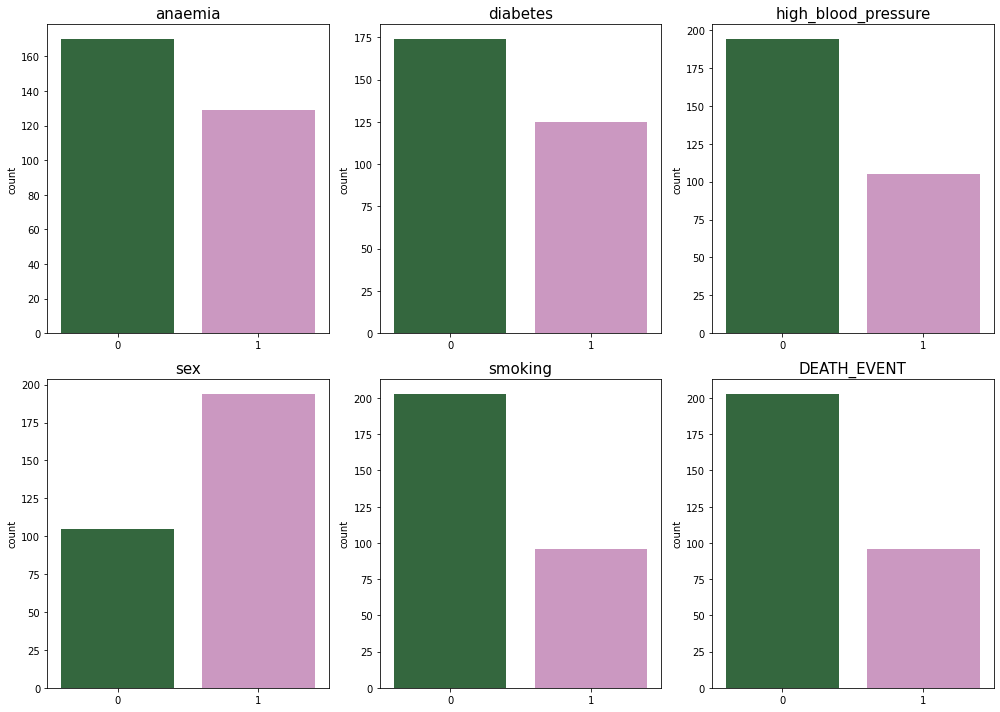

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

ax_title_pairs = zip(axs.flat, cat_var)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=df, palette='cubehelix', ax=ax)
    ax.set_title(title, fontsize = 15)
    ax.set_xlabel('')

plt.tight_layout()

We check the proportion of values in categorical variables. There are no variables, where the proportion of 0 and 1 are similar.

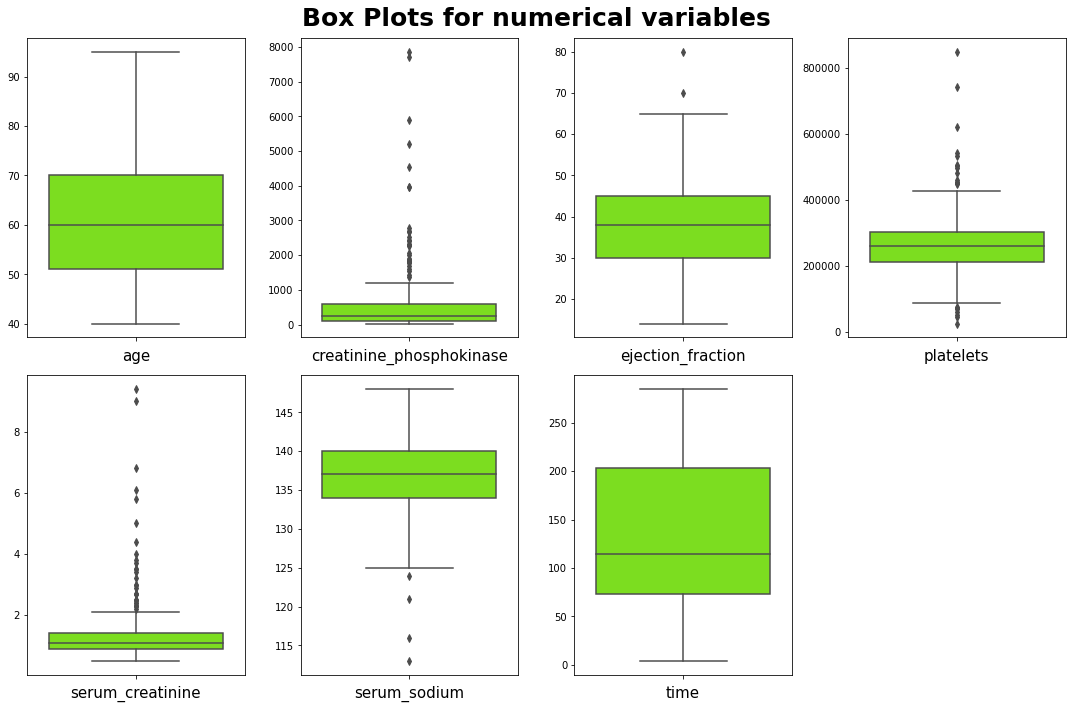

In [8]:
# Checking for the distribution of the numeric features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (15,10))
ax_title_pairs = zip(axs.flat, num_var)

for ax, n_var in ax_title_pairs:
    sns.boxplot(y = n_var,data = df, ax = ax, color = 'lawngreen')
    ax.set_xlabel(f"{n_var}", fontsize = 15)
    ax.set_ylabel(None)

fig.suptitle('Box Plots for numerical variables', fontsize = 25, weight = 'bold')
axs.flat[-1].remove()
plt.tight_layout()

In [9]:
df[(df['creatinine_phosphokinase']>7000) | (df['serum_creatinine']>8) | (df['platelets']>700000) | (df['serum_sodium']<120)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
60,45.0,0,7702,1,25,1,390000.00,1.0,139,1,0,60,1
109,45.0,0,292,1,35,0,850000.00,1.3,142,1,1,88,0
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


In [10]:
df = df[~((df['creatinine_phosphokinase']>7000) | (df['serum_creatinine']>8) | (df['platelets']>700000) | (df['serum_sodium']<120))]

On boxplots we can see the outliers. Here we have outliers and we decide to delete few of them, because the dataset has only 300 values so we don't want to make it a much smaller.

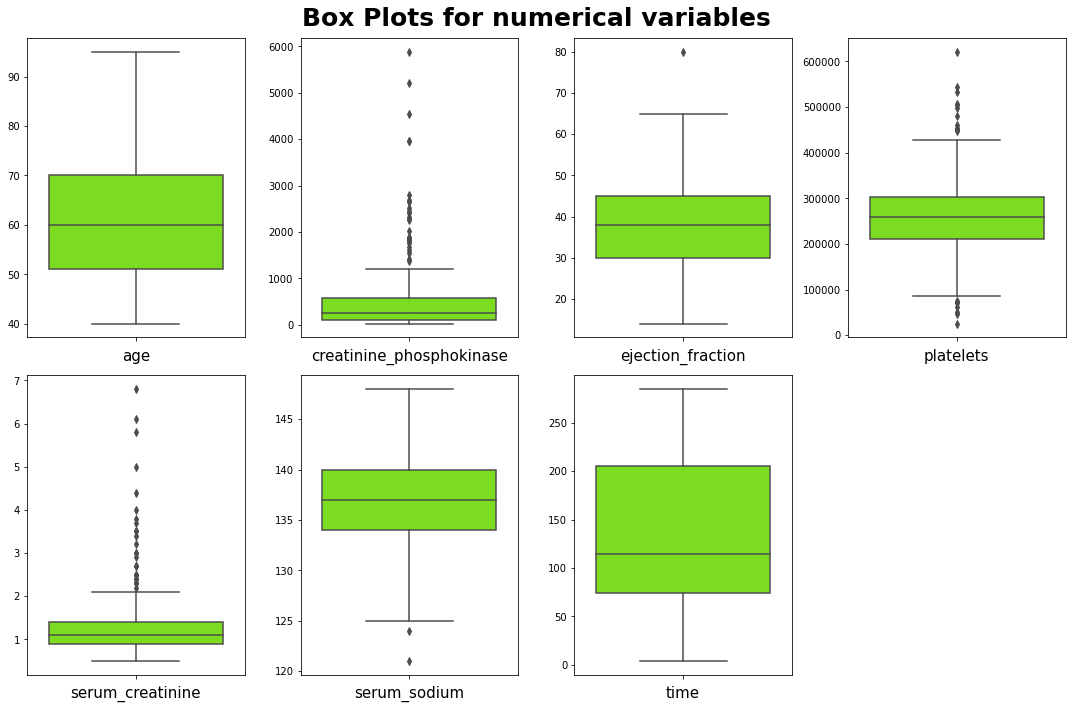

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (15,10))
ax_title_pairs = zip(axs.flat, num_var)

for ax, n_var in ax_title_pairs:
    sns.boxplot(y = n_var,data = df, ax = ax, color = 'lawngreen')
    ax.set_xlabel(f"{n_var}", fontsize = 15)
    ax.set_ylabel(None)

fig.suptitle('Box Plots for numerical variables', fontsize = 25, weight = 'bold')
axs.flat[-1].remove()
plt.tight_layout()

Above we see boxplots after deleting outliers. It is important to look on Y axis, because these dots on plots are still looking like there are outliers, but the distance between dots has changed and now these values above or below horizontal lines should not affect our results significantly.

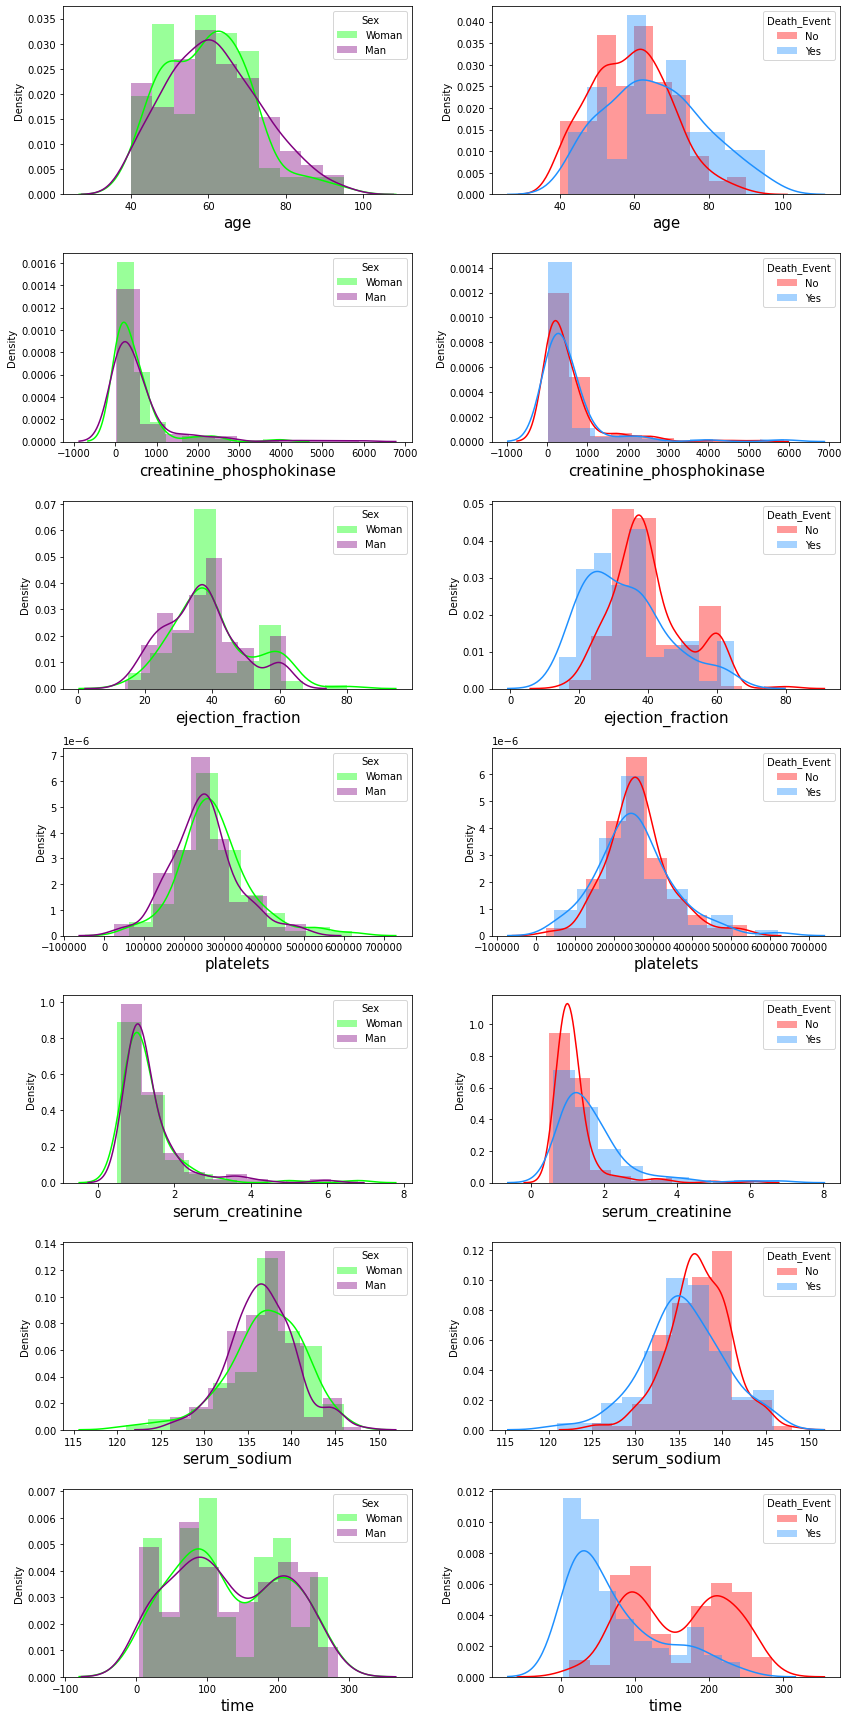

In [12]:
df_grouped = df.groupby(by=['sex'])
df_grouped_d = df.groupby(by=['DEATH_EVENT'])
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 24))
titles2 = [x for pair in zip(num_var,num_var) for x in pair]

ax_title_pairs = zip(axs.flat, titles2)

i=0
for ax, title in ax_title_pairs:
    if i%2==0:
        sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='Woman', color='lime')
        sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Man', color='purple')
        ax.set_xlabel(f"{title}",fontsize = 15)
        ax.legend(title='Sex')
    else:
        sns.distplot(df_grouped_d.get_group(0)[title], bins=10, ax=ax, label='No', color='red')
        sns.distplot(df_grouped_d.get_group(1)[title], bins=10, ax=ax, label='Yes', color='dodgerblue')
        ax.set_xlabel(f"{title}",fontsize = 15)
        ax.legend(title='Death_Event')
    i+=1

fig.tight_layout()

Plots above show distributions of numeric variables. On the left we see difference between gender, on the right difference between death event. There are only little differences on the plots between woman and man. From plots on the right we can conclude more. The most people in the probe had around 60-70 years. More people who died were older, had less ejection fraction and serum sodium. Interesting is that more people who died had higher serum creatinine. Most of people died in the first 100 days of observation.

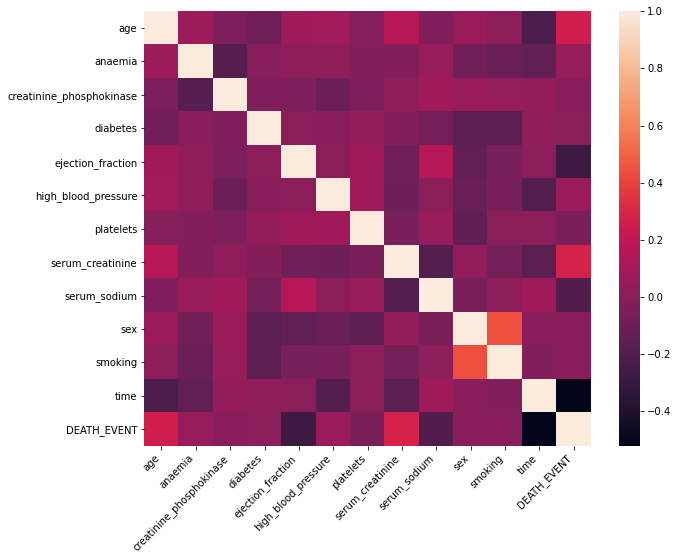

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xticks(rotation=45, ha='right');

plt.show()

In [14]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.071308,-0.035542,-0.087263,0.073494,0.090114,-0.008403,0.163521,-0.031860,0.064119,0.010195,-0.220940,0.258726
anaemia,0.071308,1.000000,-0.177670,0.000581,0.029825,0.026674,-0.012700,-0.017286,0.058814,-0.084816,-0.108096,-0.138874,0.053825
creatinine_phosphokinase,-0.035542,-0.177670,1.000000,-0.032887,-0.035565,-0.102230,-0.038080,0.028416,0.076827,0.061756,0.050642,0.048995,-0.001288
diabetes,-0.087263,0.000581,-0.032887,1.000000,0.007448,-0.000905,0.047503,-0.010344,-0.067525,-0.160036,-0.154950,0.030021,0.007141
ejection_fraction,0.073494,0.029825,-0.035565,0.007448,1.000000,0.018585,0.077183,-0.082086,0.166332,-0.135108,-0.061515,0.010066,-0.276931
high_blood_pressure,0.090114,0.026674,-0.102230,-0.000905,0.018585,1.000000,0.082537,-0.091433,0.018756,-0.109399,-0.055570,-0.199059,0.063744
platelets,-0.008403,-0.012700,-0.038080,0.047503,0.077183,0.082537,1.000000,-0.055369,0.056887,-0.144856,0.006640,0.009134,-0.040354
serum_creatinine,0.163521,-0.017286,0.028416,-0.010344,-0.082086,-0.091433,-0.055369,1.000000,-0.198163,0.033158,-0.064809,-0.161473,0.283380
serum_sodium,-0.031860,0.058814,0.076827,-0.067525,0.166332,0.018756,0.056887,-0.198163,1.000000,-0.040119,0.022534,0.081495,-0.201739
sex,0.064119,-0.084816,0.061756,-0.160036,-0.135108,-0.109399,-0.144856,0.033158,-0.040119,1.000000,0.441695,-0.000728,-0.001602


It is always recommended to see the correlation matrix. Most of correlations are low, below 0,2. The highest correlation is between smoking and sex, what was expected. Looking on death event we see age and serum creatinine with higher correlation than other variables.

In [15]:
from sklearn import feature_selection
from scipy import stats

df_mutual=df.copy()

minfos=[]
for var in cat_var[:-1]:
    print("\n", var)
    print("Pearson", stats.pearsonr(df_mutual["DEATH_EVENT"], df_mutual[var]))
    print("Mutual info", feature_selection.mutual_info_classif(df_mutual[var].values.reshape(-1,1),df_mutual["DEATH_EVENT"].values))
    minfos.append(feature_selection.mutual_info_classif(df_mutual[var].values.reshape(-1,1),df_mutual["DEATH_EVENT"].values))
    print("Chi2", feature_selection.chi2(df_mutual[var].values.reshape(-1,1),df_mutual["DEATH_EVENT"].values))
    print("Anova", feature_selection.f_classif(df_mutual[var].values.reshape(-1,1),df_mutual["DEATH_EVENT"].values))

imp = list(zip(minfos, cat_var))
imp.sort(reverse=True)
imp


 anaemia
Pearson (0.053824963379838615, 0.3602459293900044)
Mutual info [0.00715718]
Chi2 (array([0.4780259]), array([0.48931786]))
Anova (array([0.83970234]), array([0.36024593]))

 diabetes
Pearson (0.007140928985947176, 0.9034594621109088)
Mutual info [0]
Chi2 (array([0.00871978]), array([0.92560187]))
Anova (array([0.01473769]), array([0.90345946]))

 high_blood_pressure
Pearson (0.063743755240603, 0.27844930959818176)
Mutual info [0.02968227]
Chi2 (array([0.76795734]), array([0.38084971]))
Anova (array([1.17907487]), array([0.27844931]))

 sex
Pearson (-0.0016016018904674648, 0.9782972591621898)
Mutual info [0]
Chi2 (array([0.00026164]), array([0.98709447]))
Anova (array([0.00074132]), array([0.97829726]))

 smoking
Pearson (-0.0013109963371919463, 0.9822344330456136)
Mutual info [0]
Chi2 (array([0.0003403]), array([0.98528198]))
Anova (array([0.00049671]), array([0.98223443]))


[(array([0.0415939]), 'sex'),
 (array([0.03609193]), 'smoking'),
 (array([0.0004272]), 'high_blood_pressure'),
 (array([0]), 'diabetes'),
 (array([0]), 'anaemia')]

In [16]:
minfos=[]
for var in num_var:
    print(var, " Mutual info", feature_selection.mutual_info_classif(df[var].astype(float).values.reshape(-1,1),df["DEATH_EVENT"].astype(float).values))
    minfos.append(feature_selection.mutual_info_classif(df[var].astype(float).values.reshape(-1,1),df["DEATH_EVENT"].astype(float).values))

imp = list(zip(minfos, num_var))
imp.sort(reverse=True)
imp

age  Mutual info [0.06663241]
creatinine_phosphokinase  Mutual info [0.01716831]
ejection_fraction  Mutual info [0.07141664]
platelets  Mutual info [0]
serum_creatinine  Mutual info [0.06271535]
serum_sodium  Mutual info [0.02381683]
time  Mutual info [0.2382843]


[(array([0.24476638]), 'time'),
 (array([0.06472493]), 'ejection_fraction'),
 (array([0.05430751]), 'serum_creatinine'),
 (array([0.04590757]), 'age'),
 (array([0.0064123]), 'creatinine_phosphokinase'),
 (array([0.00572656]), 'serum_sodium'),
 (array([0]), 'platelets')]

In order to choose properly variables, we applied feature selection method. We ran this code many times. With numerical variables there weren't problems because in most of cases, mutual information for platelets was 0 and this variable is not used in modelling. With categorical variables it wasn't so easy because often the mutual information had changed so we decided to use all the categorical variables, because they are significant in case of information about respondents health. 

## Model

In this part of model we use data prepared in the previous part and adapt it to be used in the model. For this purpose we standardize data and split it into train and test probe. After it, we use 5 classification techniques to check which approach is the best for this dilemma.

In [17]:
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score#, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
cat_var = ['smoking','high_blood_pressure','sex', 'diabetes','anaemia']
num_var = ['time','ejection_fraction','serum_creatinine','age','creatinine_phosphokinase','serum_sodium']
        
X = df.drop(["DEATH_EVENT", 'platelets'], axis=1)
y = df["DEATH_EVENT"]

scaler = MinMaxScaler()
X[num_var] = scaler.fit_transform(X[num_var])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [19]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time
184,0.327273,1,0.020823,0,0.166667,0,0.111111,0.592593,1,1,0.590747
254,0.236364,1,0.072197,0,0.696970,1,0.079365,0.666667,1,0,0.750890
189,0.000000,0,0.037720,0,0.469697,1,0.063492,0.703704,0,0,0.604982
86,0.272727,0,0.004096,0,0.318182,1,0.095238,0.592593,1,0,0.266904
118,0.454545,1,0.015361,1,0.696970,1,0.063492,0.703704,0,0,0.320285
171,0.218182,0,0.672982,0,0.393939,0,0.063492,0.703704,1,1,0.505338
208,0.363636,1,0.385390,1,0.393939,0,0.079365,0.740741,0,0,0.651246
2,0.454545,0,0.020993,0,0.090909,0,0.126984,0.296296,1,1,0.010676
48,0.727273,1,0.090459,0,0.090909,1,0.619048,0.444444,1,0,0.131673
7,0.363636,1,0.049838,1,0.696970,0,0.095238,0.370370,1,1,0.021352


Dataset is standardized and divided into test and train part, where the test size is 0,3 what means 209 rows.

LogisticRegression:
Train
 accuracy: 0.803
 f1: 0.613
 roc_auc: 0.842

TEST 
 accuracy:  0.818 
 f1:  0.667 
 roc_auc: 0.75


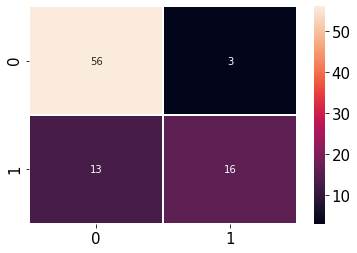

SVM:
Train
 accuracy: 0.744
 f1: 0.439
 roc_auc: 0.809

TEST 
 accuracy:  0.784 
 f1:  0.558 
 roc_auc: 0.69


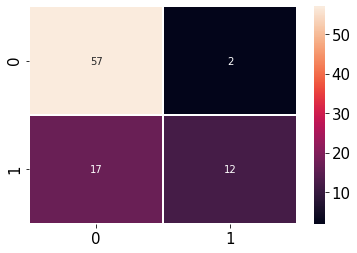

DecisionTreeClassifier:
Train
 accuracy: 0.774
 f1: 0.592
 roc_auc: 0.734

TEST 
 accuracy:  0.761 
 f1:  0.618 
 roc_auc: 0.717


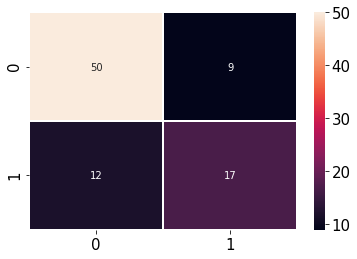

RandomForestClassifier:
Train
 accuracy: 0.823
 f1: 0.629
 roc_auc: 0.905

TEST 
 accuracy:  0.83 
 f1:  0.717 
 roc_auc: 0.785


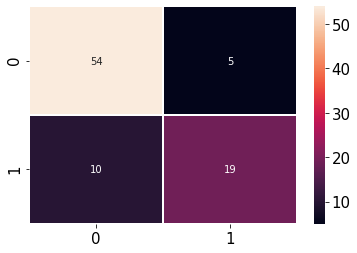

XGBClassifier:
Train
 accuracy: 0.823
 f1: 0.695
 roc_auc: 0.894

TEST 
 accuracy:  0.852 
 f1:  0.735 
 roc_auc: 0.793


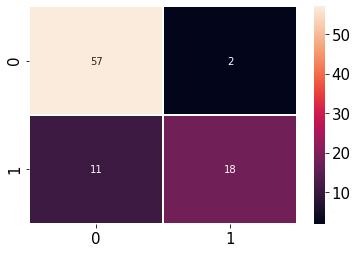

In [20]:
pd.options.display.float_format = '{:.4f}'.format

models = {
    "LogisticRegression":{"model":LogisticRegression() },
    'SVM':{"model":SVC() },
    "DecisionTreeClassifier":{"model":DecisionTreeClassifier() },
    "RandomForestClassifier":{"model":RandomForestClassifier() },
    "XGBClassifier":{"model": XGBClassifier(verbosity = 0) }
}

models_results = []
test_results=[]
scorings = ['accuracy','f1', 'roc_auc']
k = 5
#print(f"For {k}-fold CV:\n")
for name, m in models.items():

    model = m['model']
    print(f"{name:3}:\nTrain")
    for scoring in scorings:
        result = cross_validate(model.fit(X_train,y_train), X_train,y_train, cv = k, scoring=scoring)
        
        score = result['test_score']
        mean_score=sum(score)/len(score)
        mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 3)

        m['mean_score'] = mean_score
        m['Training time (sec)'] = mean_fit_time
        m['scoring'] = scoring
        
        lst = [name,m['scoring'], m['mean_score'],m['Training time (sec)']]
        models_results.append(lst)
        
        #print(f" Scoring: {scoring} \n Scores: {score} \n Mean_{scoring}: {mean_score} \n Mean training time {mean_fit_time} sec\n")
        print(f" {scoring}: {round((mean_score),3)}")
    
    preds = model.predict(X_test)
    
    tr={'Model': name,'Accuracy':round(accuracy_score(y_test, preds),3)
        ,'F1 score':round(f1_score(y_test, preds),3)
        , 'ROC_AUC': round(roc_auc_score(y_test, preds),3)}
    test_results.append(tr)
    
    print( "\nTEST"
          ,"\n accuracy: ", round(accuracy_score(y_test, preds),3)
          ,"\n f1: ", round(f1_score(y_test, preds),3)
          ,"\n roc_auc:", round(roc_auc_score(y_test, preds),3) )
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm,annot=True, linewidths=.5)
    plt.show()
    

We decided to use 5 models - Logistic Regression, SVM, Decision Tree, Random Forest and XGBoost. Cross validation with 5 k-folds was applied for every model. Accuracy, f1 score and roc auc are computed as a mean results from cross validation. In addition, the training time is calculated and confusion matrix are shown. 

### Train scores

In [21]:
df_results = pd.DataFrame(models_results, 
                          columns = ['Model','Scoring','Mean score','Training time (sec)'])
df_results.sort_values(by=['Model'], ascending=True, inplace=True)
df_results['Scoring']=df_results['Scoring'].str.capitalize()
df_results

,Model,Scoring,Mean score,Training time (sec)
6,DecisionTreeClassifier,Accuracy,0.7738,0.0040
7,DecisionTreeClassifier,F1,0.5919,0.0040
8,DecisionTreeClassifier,Roc_auc,0.7337,0.0040
0,LogisticRegression,Accuracy,0.8034,0.0200
1,LogisticRegression,F1,0.6129,0.0230
2,LogisticRegression,Roc_auc,0.8423,0.0190
9,RandomForestClassifier,Accuracy,0.8229,0.2340
10,RandomForestClassifier,F1,0.6288,0.1600
11,RandomForestClassifier,Roc_auc,0.9054,0.1620
3,SVM,Accuracy,0.7443,0.0060


In [22]:
pd.pivot_table(df_results, values=['Mean score','Training time (sec)'], index=['Scoring'], columns=['Model'], aggfunc=np.sum)

Mean score                                            \
Model    DecisionTreeClassifier LogisticRegression RandomForestClassifier   
Scoring                                                                     
Accuracy                 0.7738             0.8034                 0.8229   
F1                       0.5919             0.6129                 0.6288   
Roc_auc                  0.7337             0.8423                 0.9054   

                                 Training time (sec)                     \
Model       SVM XGBClassifier DecisionTreeClassifier LogisticRegression   
Scoring                                                                   
Accuracy 0.7443        0.8230                 0.0040             0.0200   
F1       0.4388        0.6955                 0.0040             0.0230   
Roc_auc  0.8088        0.8937                 0.0040             0.0190   

                                                      
Model    RandomForestClassifier    SVM XGBClassifier  
Scoring                                               
Accuracy                 0.2340 0.0060        0.1540  
F1                       0.1600 0.0060        0.1570  
Roc_auc                  0.1620 0.0050        0.1490

Tables above shows results for every model and scoring. We will analyze it later.

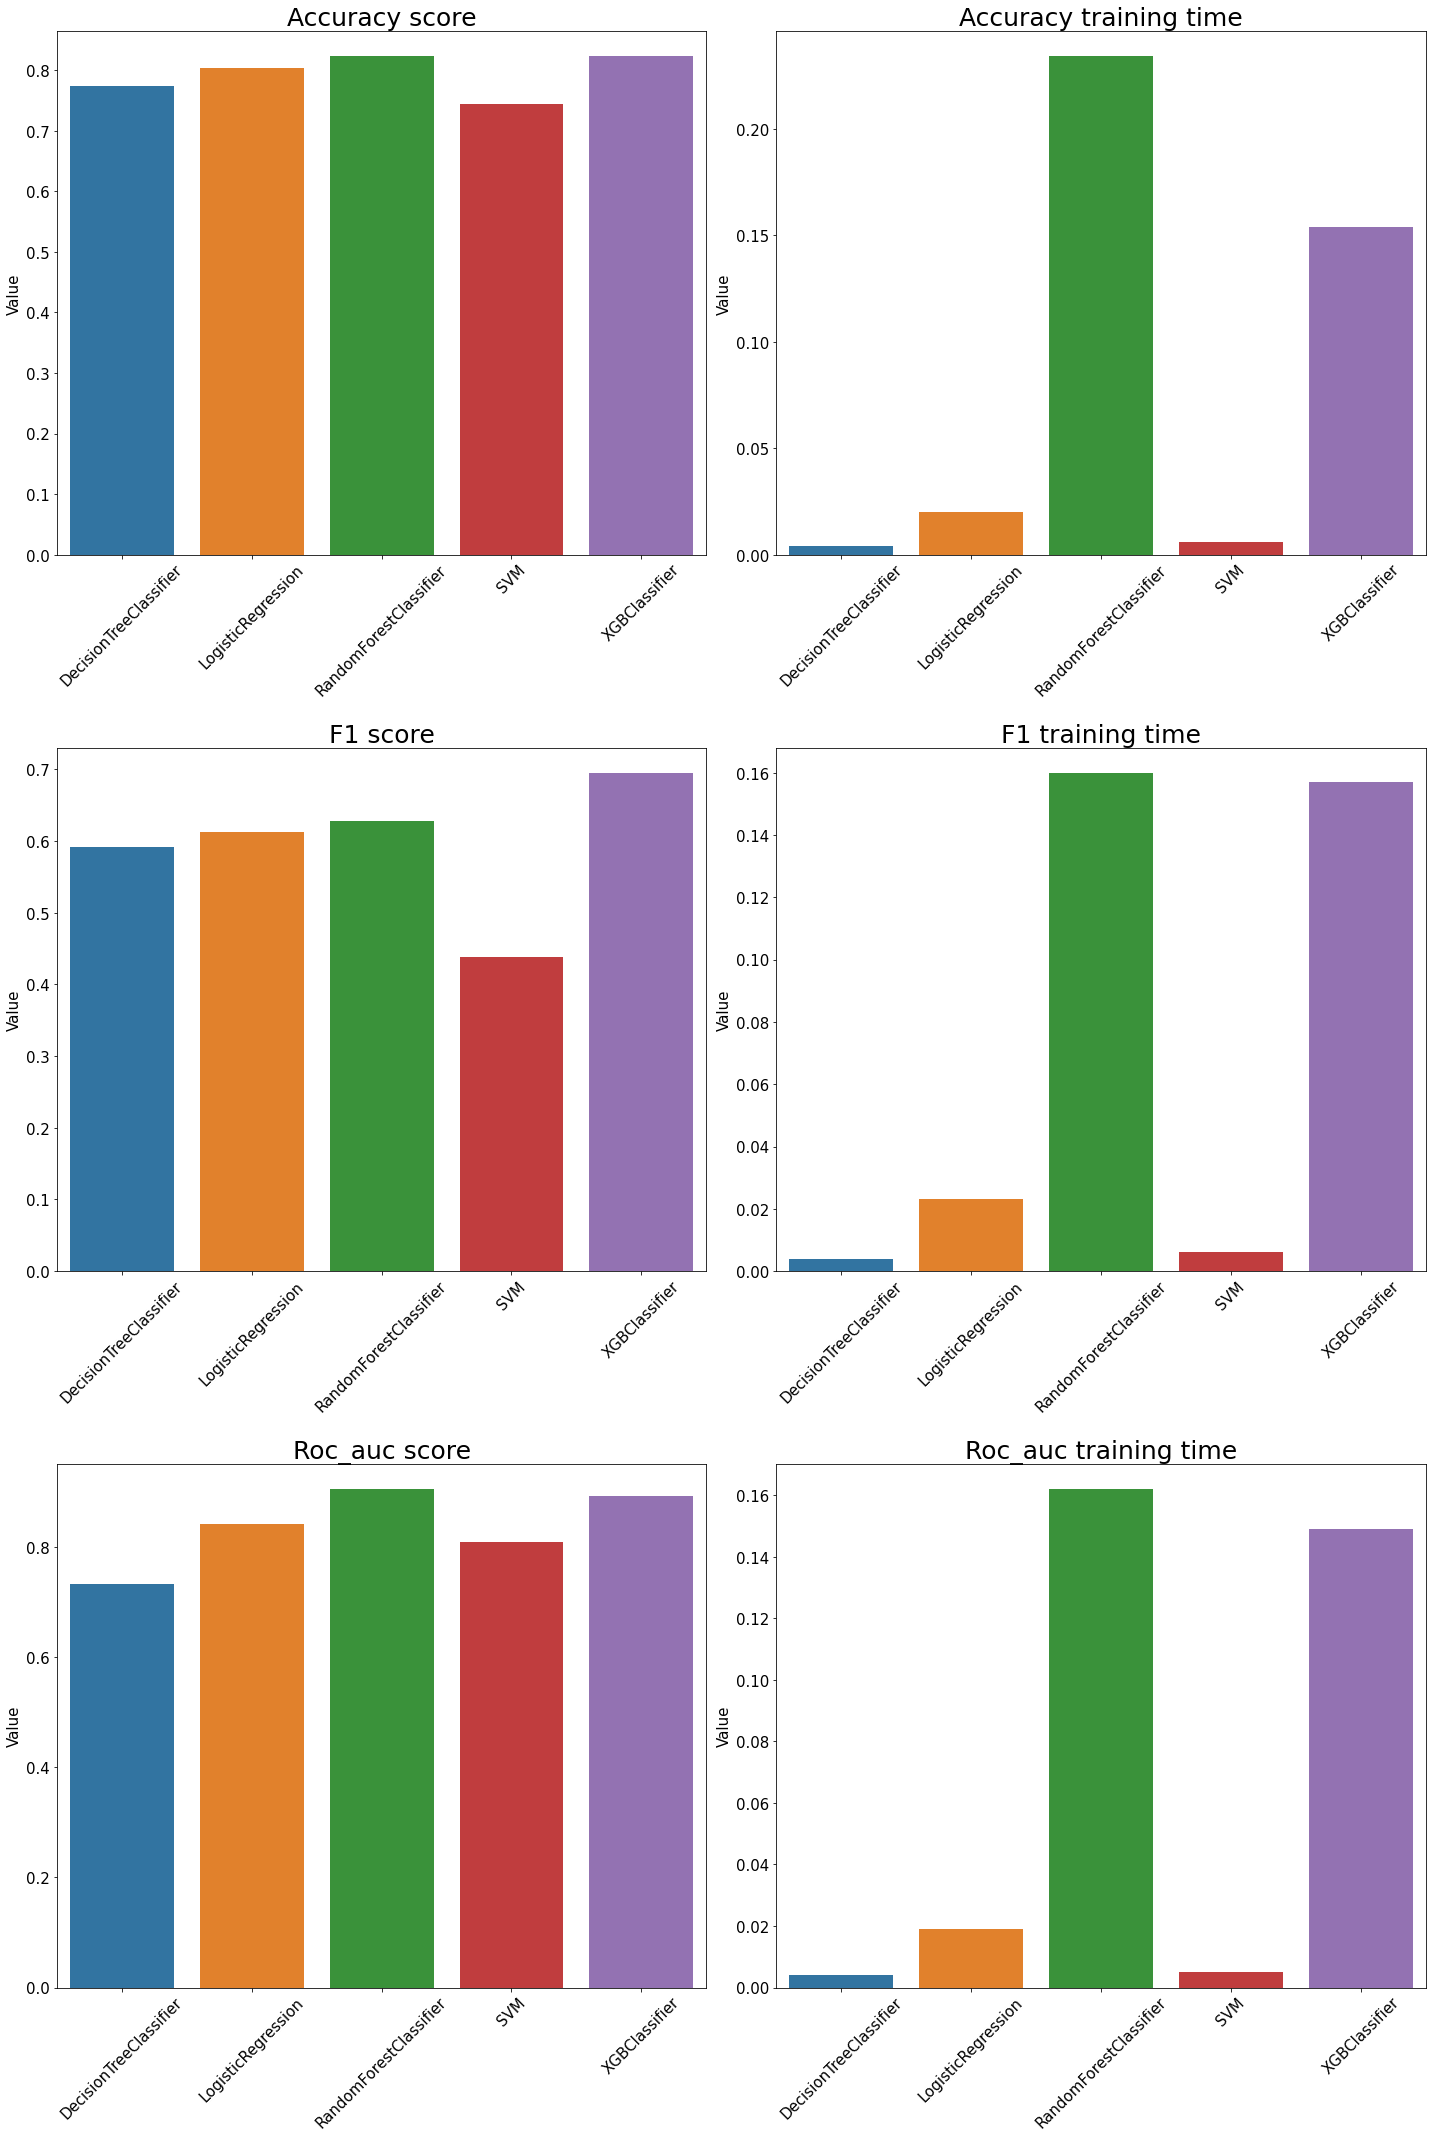

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (20,30))
scorings_plot = ['Accuracy','F1','Roc_auc']
scorings2 = [x for pair in zip(scorings_plot,scorings_plot) for x in pair]

ax_title_pairs = zip(axs.flat, scorings2)

i=0
for ax, scoring in ax_title_pairs:
    if i%2==0:
        sns.barplot(x = 'Model', y = 'Mean score', data = df_results[df_results['Scoring']==scoring], ax=ax)
        ax.set_title(scoring+' score', fontsize = 25)
        ax.set_xlabel('Model',color='white')
        ax.set_ylabel('Value',fontsize=15)
        ax.xaxis.set_tick_params(rotation=45)
    else: 
        sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_results[df_results['Scoring']==scoring], ax=ax)
        ax.set_title(scoring+' training time', fontsize = 25)
        ax.set_xlabel('Model',color='white')
        ax.set_ylabel('Value',fontsize=15)
        ax.xaxis.set_tick_params(rotation=45)
    i+=1

plt.tight_layout()

Accuracy is similar for every model. F1 score and ROC_auc in Random Forest and XGBoost have the highest score, but also have the highest training time. Decision Tree has the lowest roc_auc score and so do the training time.

In [24]:
# The highest mean scores
df_results[df_results.groupby('Scoring')['Mean score'].transform('max') == df_results['Mean score']]

,Model,Scoring,Mean score,Training time (sec)
11,RandomForestClassifier,Roc_auc,0.9054,0.1620
12,XGBClassifier,Accuracy,0.8230,0.1540
13,XGBClassifier,F1,0.6955,0.1570


In [25]:
# The fastest training time
df_results[df_results.groupby('Scoring')['Training time (sec)'].transform('min') == df_results['Training time (sec)']]

,Model,Scoring,Mean score,Training time (sec)
6,DecisionTreeClassifier,Accuracy,0.7738,0.0040
7,DecisionTreeClassifier,F1,0.5919,0.0040
8,DecisionTreeClassifier,Roc_auc,0.7337,0.0040


In [26]:
# The slowest training time
df_results[df_results.groupby('Scoring')['Training time (sec)'].transform('max') == df_results['Training time (sec)']]

,Model,Scoring,Mean score,Training time (sec)
9,RandomForestClassifier,Accuracy,0.8229,0.2340
10,RandomForestClassifier,F1,0.6288,0.1600
11,RandomForestClassifier,Roc_auc,0.9054,0.1620


In [27]:
# The highest roc_auc
df_results[df_results['Scoring'] == 'Roc_auc'].sort_values(by = 'Mean score', ascending = False)

,Model,Scoring,Mean score,Training time (sec)
11,RandomForestClassifier,Roc_auc,0.9054,0.1620
14,XGBClassifier,Roc_auc,0.8937,0.1490
2,LogisticRegression,Roc_auc,0.8423,0.0190
5,SVM,Roc_auc,0.8088,0.0050
8,DecisionTreeClassifier,Roc_auc,0.7337,0.0040


### Test scores

In [28]:
tr = pd.DataFrame(test_results)
tr

,Model,Accuracy,F1 score,ROC_AUC
0,LogisticRegression,0.8180,0.6670,0.7500
1,SVM,0.7840,0.5580,0.6900
2,DecisionTreeClassifier,0.7610,0.6180,0.7170
3,RandomForestClassifier,0.8300,0.7170,0.7850
4,XGBClassifier,0.8520,0.7350,0.7930


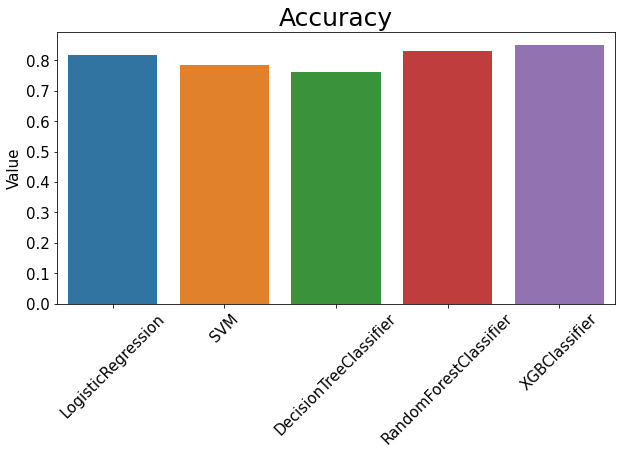

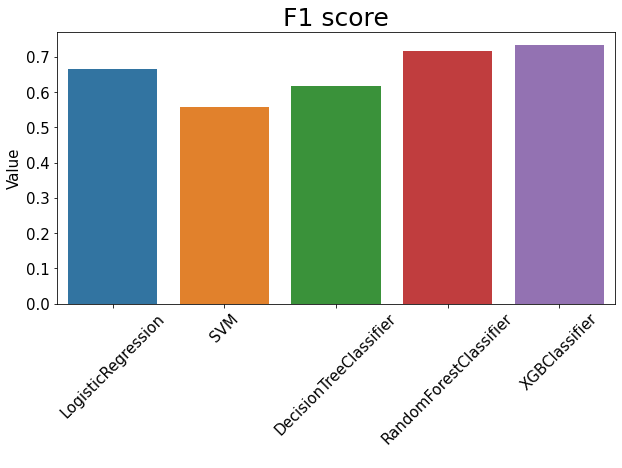

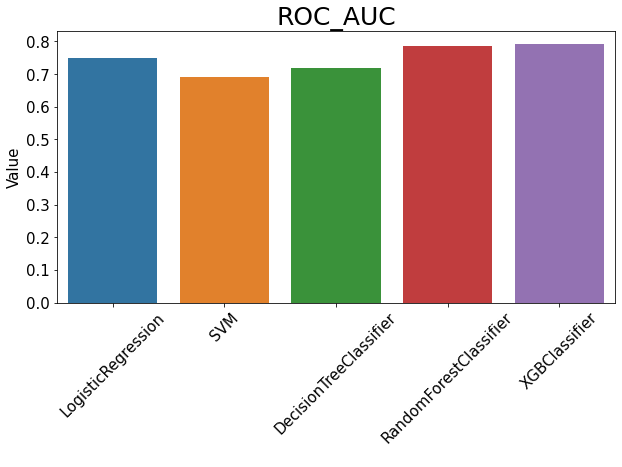

In [29]:
for scoring in tr.columns[1:].tolist():
    plt.figure(figsize = (10,5))
    sns.barplot(x = 'Model', y = scoring, data = tr)
    plt.title(scoring, fontsize = 25)
    plt.xlabel('Model',color='white')
    plt.ylabel('Value',fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    plt.show()

The highest scores has XGBoost, but there is little difference between XGBoost, Logistic Regression and Random Forest. SVM has the lowest scores. In that case, probably the best model is XGBoost but these differences between other models scores are very little, so other models are also great in terms of roc_auc, accuracy and f1 score.

# Conclusion

It is hard to choose the best model. Random Forest and XGBoost had pretty the same scores. Random Forest was the slowest in case of computational time, but XGboost was also slow compare to other methods. Nevertheless, interesting results were also presented by using Logistic Regression - little less scorings values but a lot smaller training time. In this project, the dataset was small so computation time did not matter, but if the dataset was huge we should take it into account. In case of the precision of results XGBoost and Random Forest look to be the best, but if we take into account training time we also recommend to take Logistic Regresssion into account.